In [1]:
import numpy as np
from gallery_probes_generator import GalleryProbesGenerator

In [2]:
data_generator = GalleryProbesGenerator(path_to_dataset='data/dataset1/', probes_length=200)

gallery_names, gallery_pictures = data_generator.get_gallery()
probe_names, probe_pictures = data_generator.get_merged_probes() #changer qd la methode get_probe_total ready


In [3]:
norms = { "L1":lambda x: np.sum(np.abs(x)),
	  "L2":lambda x: np.sum(x**2),
	  "inf":lambda x: np.max(np.abs(x))
	}

def compute_distances_individual(data, query, norm="L2"):
	""" Compute distances.

	Computes the distances between the vectors (rows) of a dataset and a
	single query). Three distances are supported:
	  * Manhattan distance ("L1");
	  * squared Euclidean distance ("L2");
	  * Chebyshev distance ("inf").

	:param data: Dataset matrix with samples as rows.
	:param query: Query vector
	:type data: (n,d)-sized Numpy array of floats
	:type query: (d)-sized Numpy array of floats

	:result: The distances of the data vectors to the query.
	:rtype: (n)-sized Numpy array of floats
	"""
	norm_function = norms[norm]
	distances = np.zeros((len(data),), dtype=np.float32)
	for i, d in enumerate(data):
		distances[i] = norm_function(d-query)
	return distances

def compute_distance(gallery_pictures, probe_pictures, norm='L2'):
    total_array_distance = np.zeros(dtype=object, shape=200)
    for i, pic, in enumerate(probe_pictures):
        total_array_q = np.zeros(dtype=object, shape=273)
        for j, n in enumerate(gallery_pictures):
            total_array_q[j] = compute_distances_individual(n,pic)
            total_array_distance[i] = total_array_q
    return total_array_distance

In [4]:
#test
id_probe = 0
id_gallery = 0
probe_pictures_q = probe_pictures[id_probe]
print(probe_names[id_probe])

gallery_pictures_list = gallery_pictures[id_gallery]
print(gallery_names[id_gallery])

distance_test = compute_distances_individual(gallery_pictures_list,probe_pictures_q)
print(f"moyenne main:{np.mean(distance_test)}")
print(distance_test)

saduah
9326871
moyenne main:2326770.25
[2342822. 2357001. 2316971. 2330525. 2330135. 2328753. 2320794. 2324218.
 2297766. 2313462. 2341730. 2318106. 2331256. 2324244. 2303065. 2349244.
 2325168. 2322261. 2331117.]


In [5]:
#distance = compute_distance(gallery_pictures,probe_pictures)
#print(distance.shape)

In [8]:
def radius_search_bruteforce(data, q, radius, norm = 'L2'):
    distance_matrix = compute_distance(data, q, norm)
    res_all_probe = np.zeros(dtype=object, shape=200)
    for i, row in enumerate(distance_matrix):
        id_list = []
        for j, second_row in enumerate(row):
            for k, element in enumerate(second_row):
                if element <= radius:
                    id_list.append((j,k,element))
        res_all_probe[i] = id_list
    return res_all_probe

In [18]:
resultat = radius_search_bruteforce(gallery_pictures, probe_pictures,1900000)
print(resultat)


[list([(236, 0, 1334086.0), (236, 1, 1306698.0), (236, 2, 1302974.0), (236, 3, 1237921.0), (236, 4, 1328851.0), (236, 5, 1539075.0), (236, 6, 1468207.0), (236, 7, 1478198.0), (236, 8, 1500664.0), (236, 9, 1362605.0), (236, 10, 1623576.0), (236, 11, 1468422.0), (236, 12, 1599283.0), (236, 13, 1526900.0), (236, 14, 1541383.0), (236, 15, 1192632.0), (236, 16, 1463998.0), (236, 17, 1269026.0), (236, 18, 1298053.0)])
 list([(79, 1, 1826165.0), (79, 2, 1747752.0), (79, 3, 1779443.0), (79, 6, 1838843.0), (79, 18, 1836666.0)])
 list([(201, 1, 1844892.0), (201, 3, 1814848.0), (201, 4, 1676121.0), (201, 5, 1435439.0), (201, 6, 1280631.0), (201, 7, 1600300.0), (201, 8, 1693840.0), (201, 9, 1669017.0), (201, 11, 1282800.0)])
 list([(138, 1, 1379030.0), (138, 4, 1166921.0), (138, 5, 928625.0), (138, 6, 1102367.0), (138, 7, 868498.0), (138, 8, 1036898.0), (138, 9, 713625.0), (138, 11, 846350.0), (138, 14, 1791788.0), (138, 15, 1691966.0), (138, 16, 1744787.0), (138, 17, 1323576.0), (138, 18, 1352276

In [ ]:
def search_index_in_gallery(data, name):
    id_in_gallery = None
    for i, element in enumerate(data):
        if name == element:
            id_in_gallery = i
    return id_in_gallery

theod
264


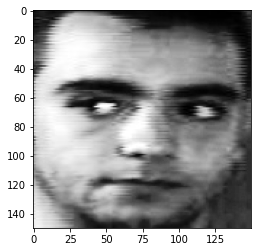

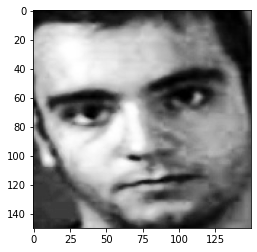

In [27]:
import matplotlib.pyplot as plt


print(probe_names[22])
index = search_index_in_gallery((gallery_names),probe_names[22])
print(index)

probe_face = plt.imshow(probe_pictures[22],cmap="gray")
plt.show()
gallery_face = plt.imshow(gallery_pictures[index][0],cmap="gray")
plt.show()

